<a href="https://colab.research.google.com/github/carolinampessoa/TechChallengeFase2/blob/main/TechChallengeFase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1) Definindo o problema**

O problema abordado neste trabalho consiste na alocação de tarefas a máquinas de forma a minimizar o tempo total de execução da máquina mais sobrecarregada, conhecido como makespan. Esse tipo de problema é clássico em contextos de escalonamento (scheduling) e balanceamento de carga, sendo comum em ambientes industriais, computacionais e logísticos.

Formalmente, temos um conjunto de 𝑛 tarefas, cada uma com um tempo de processamento associado, e um conjunto de 𝑚 máquinas idênticas. O objetivo é distribuir essas tarefas entre as máquinas de modo que o tempo total da máquina mais carregada seja o menor possível.

O problema é modelado com variáveis discretas e inteiras, pois cada tarefa deve ser atribuída a uma única máquina, representada por um número inteiro. Não há variáveis contínuas envolvidas. O espaço de busca é exponencial, uma vez que o número de possíveis alocações é $m^n$ de forma que sua complexidade cresce rapidamente com o aumento de tarefas ou máquinas.

A função a ser minimizada (o makespan) é uma função não linear e não diferenciável, pois depende do máximo dos tempos acumulados nas máquinas. Isso impede o uso direto de técnicas de otimização contínua baseadas em derivadas.

Cada tarefa deve ser atribuída a exatamente uma máquina. Não há restrições explícitas além da integridade da alocação.

O problema é classificado como np-hard, o que significa que não há algoritmo conhecido que o resolva em tempo polinomial para todos os casos.

##**2) Implementação do AG**

### 2.1) Importando bibiliotecas e definindo parâmetros iniciais

In [135]:
# Importação de bibliotecas
import random
import matplotlib.pyplot as plt

# Configurações iniciais do problema
NUM_TAREFAS = 1000
NUM_MAQUINAS = 20
TAMANHO_POPULACAO = 200
GERACOES = 100
TAXA_CROSSOVER = 0.7
TAXA_MUTACAO = 0.01

# Geração de tarefas aleatórias com tempo variando entre 1 e 15 minutos
# tarefas = [random.randint(1, 15) for _ in range(NUM_TAREFAS)]

#Após geração aleatória, optamos por manter o mesmo input inicial para comparação de melhorias no código
tarefas = [11, 13, 3, 10, 4, 3, 3, 10, 11, 1, 5, 14, 1, 1, 7, 1, 2, 4, 6, 2, 14, 3, 5, 11, 12, 10, 1, 6, 3, 9, 10, 14, 6, 8, 1, 6, 3, 7, 13, 11, 5, 14, 5, 13, 11, 5, 7, 10, 12, 8, 13, 2, 2, 5, 11, 12, 8, 7, 7, 15, 12, 14, 8, 5, 6, 11, 7, 10, 6, 12, 10, 11, 5, 13, 9, 2, 8, 7, 1, 15, 15, 10, 2, 7, 15, 8, 2, 9, 6, 6, 9, 8, 5, 10, 8, 7, 9, 8, 9, 5, 10, 4, 15, 2, 1, 3, 5, 14, 2, 8, 12, 10, 3, 1, 7, 1, 2, 3, 9, 15, 7, 8, 14, 3, 7, 1, 11, 12, 11, 3, 8, 9, 7, 4, 14, 14, 8, 14, 11, 10, 4, 15, 12, 14, 12, 14, 3, 13, 11, 10, 6, 10, 2, 2, 15, 5, 9, 2, 14, 8, 12, 8, 3, 1, 4, 13, 15, 3, 5, 9, 5, 11, 8, 13, 3, 13, 14, 15, 8, 3, 12, 9, 14, 11, 14, 1, 13, 1, 8, 1, 9, 13, 2, 13, 7, 5, 9, 3, 11, 5, 5, 7, 12, 10, 11, 6, 5, 3, 12, 9, 9, 1, 3, 11, 3, 14, 5, 14, 3, 4, 10, 13, 15, 9, 8, 10, 15, 2, 8, 14, 10, 1, 3, 8, 15, 5, 14, 9, 2, 2, 10, 15, 7, 5, 10, 15, 10, 14, 4, 8, 7, 10, 4, 7, 5, 6, 4, 10, 3, 6, 5, 9, 11, 10, 12, 9, 4, 6, 10, 1, 1, 2, 6, 7, 5, 11, 14, 10, 10, 1, 10, 7, 1, 14, 15, 6, 8, 1, 14, 6, 3, 5, 5, 14, 2, 12, 11, 10, 13, 14, 3, 15, 15, 15, 8, 8, 12, 10, 13, 1, 10, 8, 9, 6, 14, 6, 6, 15, 3, 12, 6, 8, 6, 9, 13, 6, 9, 5, 7, 8, 6, 10, 3, 9, 3, 3, 13, 4, 7, 3, 9, 11, 12, 5, 10, 13, 1, 8, 12, 13, 9, 15, 2, 13, 10, 5, 15, 1, 13, 3, 3, 1, 2, 7, 6, 13, 15, 6, 1, 8, 14, 11, 9, 6, 13, 7, 7, 1, 15, 3, 10, 3, 3, 12, 9, 10, 9, 6, 3, 3, 15, 4, 8, 2, 14, 12, 10, 9, 11, 2, 10, 1, 3, 1, 7, 6, 2, 3, 15, 14, 10, 10, 15, 3, 8, 4, 11, 5, 3, 8, 13, 1, 15, 3, 14, 11, 5, 1, 12, 8, 2, 14, 2, 14, 2, 5, 2, 6, 13, 5, 12, 15, 1, 13, 3, 7, 12, 6, 7, 15, 14, 6, 10, 5, 5, 10, 10, 2, 13, 12, 5, 7, 15, 9, 11, 14, 4, 14, 2, 9, 15, 14, 13, 8, 10, 5, 4, 5, 13, 14, 6, 7, 11, 13, 6, 5, 1, 9, 2, 3, 14, 7, 1, 2, 1, 6, 15, 4, 14, 15, 14, 3, 9, 12, 15, 12, 15, 13, 3, 14, 9, 12, 15, 6, 11, 9, 5, 9, 14, 6, 1, 9, 15, 5, 11, 4, 1, 15, 9, 3, 5, 8, 7, 8, 2, 10, 11, 8, 5, 11, 3, 11, 11, 14, 9, 15, 1, 13, 3, 10, 12, 6, 4, 8, 8, 3, 7, 3, 4, 5, 5, 7, 1, 6, 13, 10, 4, 4, 7, 8, 4, 7, 9, 8, 11, 2, 14, 3, 9, 5, 9, 2, 7, 15, 14, 3, 1, 11, 10, 14, 14, 6, 9, 9, 10, 3, 13, 15, 1, 4, 15, 4, 10, 2, 11, 12, 14, 8, 3, 3, 4, 11, 7, 7, 13, 4, 12, 2, 5, 12, 6, 3, 12, 3, 5, 10, 14, 4, 3, 9, 6, 6, 13, 6, 7, 2, 12, 9, 12, 5, 1, 7, 1, 10, 3, 2, 6, 11, 5, 8, 6, 4, 9, 1, 2, 8, 7, 9, 11, 14, 4, 2, 3, 14, 4, 5, 3, 6, 13, 2, 2, 11, 12, 8, 13, 10, 5, 7, 9, 11, 10, 14, 8, 9, 12, 14, 5, 11, 5, 1, 2, 7, 15, 8, 2, 1, 1, 2, 7, 7, 3, 10, 13, 8, 15, 13, 1, 6, 15, 9, 12, 1, 14, 10, 8, 12, 7, 1, 12, 4, 14, 9, 8, 2, 11, 3, 9, 11, 11, 14, 9, 8, 2, 4, 14, 12, 2, 6, 15, 8, 8, 2, 5, 14, 6, 5, 7, 1, 10, 9, 3, 8, 9, 13, 4, 2, 4, 1, 15, 1, 11, 10, 5, 10, 8, 5, 15, 7, 13, 15, 5, 15, 7, 8, 2, 15, 3, 2, 10, 12, 13, 4, 5, 7, 14, 2, 10, 11, 4, 4, 10, 4, 7, 1, 7, 13, 4, 12, 5, 5, 5, 7, 1, 14, 15, 9, 4, 14, 9, 10, 10, 4, 10, 1, 2, 3, 7, 1, 3, 11, 5, 11, 4, 13, 1, 5, 5, 10, 1, 12, 8, 15, 1, 6, 8, 4, 9, 10, 11, 10, 1, 15, 3, 6, 15, 2, 15, 11, 5, 14, 5, 7, 6, 7, 9, 9, 2, 3, 13, 1, 15, 5, 13, 3, 15, 4, 1, 7, 13, 5, 4, 10, 8, 15, 12, 3, 5, 4, 6, 13, 2, 15, 12, 13, 1, 4, 12, 12, 4, 9, 8, 3, 6, 7, 4, 4, 2, 13, 5, 6, 4, 1, 11, 3, 4, 11, 7, 14, 6, 10, 14, 6, 6, 11, 1, 4, 1, 6, 6, 10, 13, 13, 2, 14, 4, 15, 3, 5, 2, 7, 15, 2, 7, 14, 4, 5, 4, 3, 1, 13, 2, 7, 15, 11, 14, 5, 2, 10, 7, 9, 11, 3, 15, 15, 4, 3, 1, 1, 1, 13, 13, 1, 4, 13, 1, 3, 4, 8, 10, 9, 11, 11, 5, 9, 13, 1, 9, 13, 12, 5, 1, 10, 9, 14, 10, 14, 8, 4, 3, 6, 15, 8, 12, 1, 5, 10, 6, 9, 8, 14]


### 2.2) Codificação do indivíduo

No problema proposto, um indivíduo é representado por um vetor de valores inteiros (codificação discreta), onde o valor do elemento i representa a máquina em que foi alocada a tarefa i.

In [136]:
# CRIAR UM INDIVÍDUO (alocação de tarefas em máquinas)
def criar_individuo():
    return [random.randint(0, NUM_MAQUINAS - 1) for _ in range(NUM_TAREFAS)]

Exemplo de indíviduo gerado:

In [137]:
print(criar_individuo())

[15, 16, 17, 15, 5, 0, 11, 15, 6, 12, 2, 10, 0, 16, 2, 5, 3, 16, 15, 19, 7, 9, 2, 1, 15, 9, 13, 4, 10, 15, 14, 18, 7, 19, 17, 9, 0, 16, 6, 19, 14, 7, 16, 14, 4, 17, 5, 16, 16, 6, 11, 17, 5, 11, 10, 13, 5, 9, 8, 4, 17, 3, 9, 8, 0, 14, 11, 13, 17, 3, 6, 2, 3, 10, 2, 6, 16, 6, 17, 9, 6, 10, 10, 8, 4, 3, 12, 0, 10, 10, 7, 1, 17, 18, 6, 19, 14, 4, 0, 12, 9, 10, 19, 17, 1, 5, 19, 6, 2, 16, 19, 14, 4, 8, 7, 4, 19, 8, 8, 3, 6, 2, 8, 19, 1, 3, 8, 19, 6, 4, 18, 7, 0, 0, 5, 9, 0, 15, 19, 9, 5, 6, 9, 5, 19, 17, 4, 3, 7, 11, 3, 7, 8, 19, 1, 1, 5, 5, 12, 14, 1, 3, 12, 7, 2, 3, 13, 8, 13, 17, 17, 3, 4, 13, 2, 0, 11, 9, 15, 7, 18, 16, 11, 2, 16, 3, 2, 12, 1, 8, 2, 19, 0, 18, 13, 2, 6, 17, 14, 3, 4, 13, 0, 9, 14, 11, 18, 9, 7, 10, 1, 16, 17, 11, 15, 15, 9, 5, 17, 17, 16, 2, 15, 12, 1, 3, 19, 17, 15, 12, 12, 17, 13, 11, 11, 11, 8, 9, 2, 3, 0, 12, 3, 12, 7, 3, 3, 8, 5, 13, 5, 11, 16, 9, 17, 12, 8, 7, 6, 1, 8, 4, 19, 13, 1, 9, 0, 13, 2, 3, 16, 19, 6, 2, 0, 1, 9, 6, 1, 11, 2, 19, 8, 11, 8, 19, 5, 17, 19, 9

### 2.3) Função Fitness

A avaliação das soluções considerou dois critérios:

  1.   Makespan da máquina mais carregada, ou seja, o tempo máximo necessário para completar todas as atividades (considerando que todas máquinas rodam paralelamente);
  2.   Balanceamento dos recursos, ou seja, quão bem distribuídas as atividades estão ao longo das máquinas, de forma que não tenhamos nenhuma máquina ociosa ou engargalada demais.Para isso, avaliamos a variância dos tempos acumulados em cada máquina;

In [138]:

# AVALIAÇÃO CLÁSSICA (considera somente makespan)
def avaliar_classico(individuo):
    maquinas = [0] * NUM_MAQUINAS
    for i, m in enumerate(individuo):
        maquinas[m] += tarefas[i]
    return max(maquinas)

# AVALIAÇÃO MELHORADA (considera makespan + desbalanceamento)
def avaliar_melhorado(individuo):
    maquinas = [0] * NUM_MAQUINAS
    for i, m in enumerate(individuo):
        maquinas[m] += tarefas[i]
    makespan = max(maquinas)
    media = sum(maquinas) / NUM_MAQUINAS
    desvio = sum(abs(x - media) for x in maquinas) / NUM_MAQUINAS
    return makespan + 0.1 * desvio


### 2.4) Operadores genéticos (seleção, cruzamento e mutação)

Aqui exploramos diferentes operadores genéticos:

Para a **seleção**, simulamos uma seleção por torneio e uma seleção proporcional;

In [139]:
# SELEÇÃO POR TORNEIO: escolhe k indivíduos aleatórios e retorna o melhor
def selecao_torneio(populacao, func_avaliar, k=2):
    competidores = random.sample(populacao, k)
    return min(competidores, key=func_avaliar)

# SELEÇÃO POR PROBABILIDADE: chance proporcional ao inverso do fitness
def selecao_roleta(populacao, func_avaliar):
    # Calcula o inverso do fitness para problemas de minimização
    valores = [1 / (func_avaliar(ind) + 1e-6) for ind in populacao]
    soma_total = sum(valores)
    probs = [v / soma_total for v in valores]

    # Gera um número aleatório e seleciona o indivíduo correspondente
    r = random.random()
    acumulado = 0
    for ind, p in zip(populacao, probs):
        acumulado += p
        if acumulado >= r:
            return ind
    return populacao[-1]


Para o **cruzamento**, implementamos o Uniform Crossover e o Single Point Crossover;

In [140]:
# SINGLE POINT CROSSOVER (crossover de um ponto: combina parte inicial do pai1 e final do pai2)
def single_point_crossover(pai1, pai2):
    ponto = random.randint(1, NUM_TAREFAS - 1)
    filho = pai1[:ponto] + pai2[ponto:]
    return filho


# UNIFORM CROSSOVER ( Crossover uniforme: para cada gene, escolhe aleatoriamente de qual pai herdar)
def uniform_crossover(pai1, pai2):
    filho = []
    for gene1, gene2 in zip(pai1, pai2):
        if random.random() < 0.5:
            filho.append(gene1)
        else:
            filho.append(gene2)
    return filho

Analisando os resultados iniciais, vimos que o resultado sem crossover estava sendo levemente melhor do que aquele considerando o operador de cruzamento. Isso pode ocorrer quando o problema é altamente independente gene a gene, ou seja, cada gene (tarefa → máquina) é relativamente independente dos outros.

O crossover (principalmente o single-point) troca blocos grandes de genes que podem não ter relação, destruindo boas combinações de alocações e gerando descendentes piores. Além disso, se a seleção é forte (elitismo), a população pode melhorar mais sem crossover, apenas por mutação guiada.

Assim, um crossover guiado pode ser mais útil. Por isso, implementamos também uma função de cruzamento que troca apenas as tarefas que contribuem para o makespan elevado.


In [141]:
def guided_crossover(pai1, pai2): # Crossover guiado: escolhe para cada tarefa o pai que gera menor carga acumulada.
    filho = []
    cargas = [0] * NUM_MAQUINAS

    for i in range(NUM_TAREFAS):
        # Opções de máquina dos pais
        m1 = pai1[i]
        m2 = pai2[i]

        # Calcula carga se escolher cada máquina
        carga1 = cargas[m1] + tarefas[i]
        carga2 = cargas[m2] + tarefas[i]

        # Escolhe a opção que gera menor carga
        if carga1 < carga2:
            filho.append(m1)
            cargas[m1] += tarefas[i]
        elif carga2 < carga1:
            filho.append(m2)
            cargas[m2] += tarefas[i]
        else:
            # Se iguais, escolhe aleatoriamente
            escolha = random.choice([m1, m2])
            filho.append(escolha)
            cargas[escolha] += tarefas[i]

    return filho

Para a mutação, implementamos a mutação guiada e a mutação adaptativa;

In [142]:

# MUTAÇÃO GUIADA
def aplicar_mutacao(individuo, metodo_mutacao, geracao):
    if metodo_mutacao == 'none':
        return individuo
    if metodo_mutacao == 'avancada':
       individuo = aplicar_mutacao_avancada(individuo, geracao, GERACOES)
       return individuo
    num_mutacoes = int(NUM_TAREFAS * TAXA_MUTACAO)
    for _ in range(num_mutacoes):
        idx = random.randint(0, NUM_TAREFAS - 1)
        if metodo_mutacao == 'guiada':
            cargas = [0] * NUM_MAQUINAS
            for i, m in enumerate(individuo):
                cargas[m] += tarefas[i]
            melhor_maquina = cargas.index(min(cargas))
            individuo[idx] = melhor_maquina
        else:
            individuo[idx] = random.randint(0, NUM_MAQUINAS - 1)
    return individuo

    Mutação adaptativa que escolhe dinamicamente o tipo de mutação conforme a fase da evolução:
    - Início: mais aleatória e em blocos para explorar.
    - Meio: swap mutation para diversidade.
    - Final: mutação guiada e informada para refinamento local.


In [143]:
def aplicar_mutacao_avancada(individuo, geracao, total_geracoes):
    # Fração do progresso do AG
    progresso = geracao / total_geracoes

    # Número de mutações a aplicar
    num_mutacoes = max(1, int(NUM_TAREFAS * TAXA_MUTACAO))

    for _ in range(num_mutacoes):
        escolha = random.random()

        # 1️⃣ Fase inicial (exploração aleatória)
        if progresso < 0.3:
            if escolha < 0.7:
                # Mutação aleatória simples
                idx = random.randint(0, NUM_TAREFAS - 1)
                individuo[idx] = random.randint(0, NUM_MAQUINAS - 1)
            else:
                # Mutação em bloco (reatribuir várias tarefas)
                for idx in random.sample(range(NUM_TAREFAS), k=min(5, NUM_TAREFAS)):
                    individuo[idx] = random.randint(0, NUM_MAQUINAS - 1)

        # 2️⃣ Fase intermediária (diversidade controlada via swap)
        elif progresso < 0.7:
            if escolha < 0.5:
                # Swap mutation
                i, j = random.sample(range(NUM_TAREFAS), 2)
                individuo[i], individuo[j] = individuo[j], individuo[i]
            else:
                idx = random.randint(0, NUM_TAREFAS - 1)
                individuo[idx] = random.randint(0, NUM_MAQUINAS - 1)

        # 3️⃣ Fase final (refinamento inteligente)
        else:
            if escolha < 0.6:
                # Mutação guiada (máquina menos carregada)
                cargas = [0] * NUM_MAQUINAS
                for i, m in enumerate(individuo):
                    cargas[m] += tarefas[i]
                idx = random.randint(0, NUM_TAREFAS - 1)
                melhor_maquina = cargas.index(min(cargas))
                individuo[idx] = melhor_maquina
            else:
                # Reassign inteligente: escolhe tarefa da máquina mais carregada
                cargas = [0] * NUM_MAQUINAS
                for i, m in enumerate(individuo):
                    cargas[m] += tarefas[i]
                maquina_max = max(range(NUM_MAQUINAS), key=lambda m: cargas[m])
                tarefas_maquina = [i for i, m in enumerate(individuo) if m == maquina_max]
                if tarefas_maquina:
                    tarefa = random.choice(tarefas_maquina)
                    melhor_maquina = min(range(NUM_MAQUINAS),
                                         key=lambda m: cargas[m] + tarefas[tarefa])
                    individuo[tarefa] = melhor_maquina

    return individuo

HOTSTART: Greedy Solution

In [144]:
# GREEDY SOLUTION (HOTSTART): aloca sempre na máquina mais livre
def solucao_greedy():
    maquinas = [0] * NUM_MAQUINAS
    individuo = []
    for t in tarefas:
        idx = maquinas.index(min(maquinas))
        maquinas[idx] += t
        individuo.append(idx)
    return individuo

# POPULAÇÃO INICIAL (com ou sem hotstart)
def criar_populacao(usar_injecao_greedy):
    pop = [criar_individuo() for _ in range(int(TAMANHO_POPULACAO/2))] if usar_injecao_greedy else [criar_individuo() for _ in range(TAMANHO_POPULACAO)]
    if usar_injecao_greedy:
        base = solucao_greedy()
        for _ in range(5):
            mutado = aplicar_mutacao(base[:], 'guiada', 0)
            pop.append(mutado)
    return pop


### 2.5) Loop principal do AG

In [145]:
# EXECUÇÃO DO AG COM CONFIGURAÇÕES DINÂMICAS

def executar_ag(nome_execucao, melhorado=False, tipo_crossover='none', metodo_mutacao = 'none', metodo_selecao='torneio'):
    print(f"\n--- {nome_execucao} ---")
    usar_injecao_greedy = melhorado
    func_avaliar = avaliar_melhorado if melhorado else avaliar_classico
    populacao = criar_populacao(usar_injecao_greedy)
    melhor = min(populacao, key=func_avaliar)
    historico = [func_avaliar(melhor)]

    for geracao in range(GERACOES):
        nova_pop = [melhor]
        while len(nova_pop) < TAMANHO_POPULACAO:
            if metodo_selecao == 'torneio':
                p1 = selecao_torneio(populacao, func_avaliar)
                p2 = selecao_torneio(populacao, func_avaliar)
            else:
                p1 = selecao_roleta(populacao, func_avaliar)
                p2 = selecao_roleta(populacao, func_avaliar)

            if tipo_crossover != 'none' and random.random() < TAXA_CROSSOVER:
                if tipo_crossover == 'single':
                    filho = single_point_crossover(p1, p2)
                elif tipo_crossover == 'uniform':
                    filho = uniform_crossover(p1, p2)
                elif tipo_crossover == 'guided':
                    filho = guided_crossover(p1, p2)
            else:
                filho = p1[:]

            filho = aplicar_mutacao(filho, metodo_mutacao, geracao)
            nova_pop.append(filho)

        populacao = nova_pop
        melhor_atual = min(populacao, key=func_avaliar)
        if func_avaliar(melhor_atual) < func_avaliar(melhor):
            melhor = melhor_atual

        historico.append(func_avaliar(melhor))
        print(f"Geração {geracao+1:3}: Melhor fitness = {func_avaliar(melhor)}")

    return melhor, historico, func_avaliar(melhor)

## **3) Testes e Resultados**

Avaliando resultados do AG com diferentes configurações

In [146]:
# VARIAÇÕES (nome, versão melhorada, crossover, mutação, )
versoes = [
    ("AG Clássico - sem crossover e sem mutação",False,'none','none'),
    ("AG Clássico - com crossover single point e sem mutação", False, 'single','none'),
    ("AG Clássico - sem crossover e com mutação guiada", False, 'none', 'guiada'),
    ("AG Clássico - com crossover single point e com mutação guiada", False, 'single', 'guiada'),
    ("AG Melhorado - sem crossover e sem mutação", True,'none','none'),
    ("AG Melhorado - com crossover single point, sem mutação", True, 'single','none'),
    ("AG Melhorado - sem crossover, com mutação guiada", True, 'none', 'guiada'),
    ("AG Melhorado - com crossover single point e com mutação guiada", True, 'single', 'guiada'),
]

resultados = {}
for nome, melhorado, cross, mut in versoes:
    melhor, hist, fitness = executar_ag(nome, melhorado,cross, mut)
    resultados[nome] = {
        "historico": hist,
        "fitness": fitness,
    }

# Greedy Solution
sol_greedy = solucao_greedy()
fitness_greedy = avaliar_classico(sol_greedy)

print("\n==================== RESULTADOS FINAIS ====================")
for nome, dados in resultados.items():
    print(f"{nome:50} -> Fitness final: {dados['fitness']:.2f}")
print(f"{'Greedy Solution':50} -> Fitness final: {fitness_greedy:.2f}")
print("===========================================================")




--- AG Clássico - sem crossover e sem mutação ---
Geração   1: Melhor fitness = 448
Geração   2: Melhor fitness = 448
Geração   3: Melhor fitness = 448
Geração   4: Melhor fitness = 448
Geração   5: Melhor fitness = 448
Geração   6: Melhor fitness = 448
Geração   7: Melhor fitness = 448
Geração   8: Melhor fitness = 448
Geração   9: Melhor fitness = 448
Geração  10: Melhor fitness = 448
Geração  11: Melhor fitness = 448
Geração  12: Melhor fitness = 448
Geração  13: Melhor fitness = 448
Geração  14: Melhor fitness = 448
Geração  15: Melhor fitness = 448
Geração  16: Melhor fitness = 448
Geração  17: Melhor fitness = 448
Geração  18: Melhor fitness = 448
Geração  19: Melhor fitness = 448
Geração  20: Melhor fitness = 448
Geração  21: Melhor fitness = 448
Geração  22: Melhor fitness = 448
Geração  23: Melhor fitness = 448
Geração  24: Melhor fitness = 448
Geração  25: Melhor fitness = 448
Geração  26: Melhor fitness = 448
Geração  27: Melhor fitness = 448
Geração  28: Melhor fitness = 4

Gráfico comparativo das diferentes versões de Algoritmo Genético implementadas.

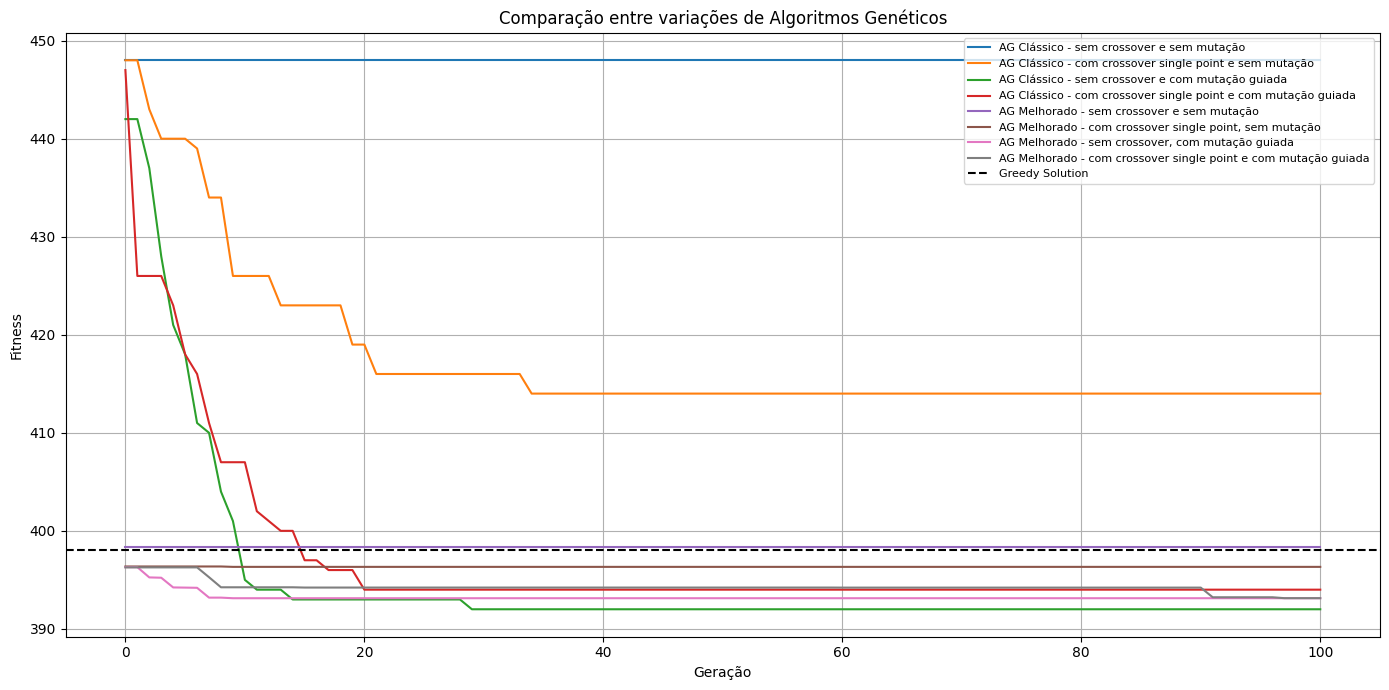

In [147]:
# GRÁFICO COMPARATIVO
plt.figure(figsize=(14, 7))
for nome, dados in resultados.items():
    plt.plot(dados["historico"], label=nome)
plt.axhline(y=fitness_greedy, color='black', linestyle='--', label="Greedy Solution")
plt.xlabel("Geração")
plt.ylabel("Fitness")
plt.title("Comparação entre variações de Algoritmos Genéticos")
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

In [148]:
print("ANÁLISE DOS RESULTADOS:")
print("=" * 100)

# Encontrar melhor e pior resultado
fitness_values = [d['fitness'] for d in resultados.values()]
nomes = list(resultados.keys())

melhor_idx = fitness_values.index(min(fitness_values))
pior_idx = fitness_values.index(max(fitness_values))

melhor_nome = nomes[melhor_idx]
pior_nome = nomes[pior_idx]
melhor_fitness = fitness_values[melhor_idx]
pior_fitness = fitness_values[pior_idx]

print(f"-  MELHOR RESULTADO:")
print(f"   {melhor_nome}")
print(f"   Fitness: {melhor_fitness:.2f}")
print("-" * 100)
print(f"-  PIOR RESULTADO:")
print(f"   {pior_nome}")
print(f"   Fitness: {pior_fitness:.2f}")
print("-" * 100)
# Comparação com greedy
melhoria_vs_greedy = ((fitness_greedy - melhor_fitness) / fitness_greedy) * 100
print(f"-  COMPARAÇÃO COM GREEDY:")
print(f"   Greedy: {fitness_greedy:.2f}")
print(f"   Melhor AG: {melhor_fitness:.2f}")
print(f"   Melhoria: {melhoria_vs_greedy:.2f}%")

ANÁLISE DOS RESULTADOS:
-  MELHOR RESULTADO:
   AG Clássico - sem crossover e com mutação guiada
   Fitness: 392.00
----------------------------------------------------------------------------------------------------
-  PIOR RESULTADO:
   AG Clássico - sem crossover e sem mutação
   Fitness: 448.00
----------------------------------------------------------------------------------------------------
-  COMPARAÇÃO COM GREEDY:
   Greedy: 398.00
   Melhor AG: 392.00
   Melhoria: 1.51%


Com base nas simulações acima, é possível identificar que as melhores soluções foram obtidas para:

  **1) AG Clássico sem crossover e com mutação guiada:** população inicial gerada aleatoriamente + função fitness considera apenas o makespan + sem cruzamento (filhos = pais) + mutação guiada pelo balanceamento da carga;

  **2) AG melhorado sem crossover e com mutação guiada:**  hotstart da população com alguns indivíduos da solução greedy + função fitness considera não só o makespan como também o balanceamento da carga + sem cruzamento (filhos = pais) + mutação guiada pelo balanceamento da carga;

  Assim, conclui-se que o cruzamento para esse caso específico acabou não tendo um impacto positivo na solução.

In [150]:
# VARIAÇÕES (nome, versão melhorada, crossover, mutação, seleção)
versoes = [
    ("AG Clássico - com crossover uniform e com mutação guiada", False, 'uniform', 'guiada', 'torneio'),
    ("AG Clássico - com crossover guiado e com mutação guiada", False, 'guided', 'guiada', 'torneio'),
    ("AG Clássico - com crossover uniform e com mutação avançada", False, 'uniform', 'avancada', 'torneio'),
    ("AG Clássico - com crossover guiado e com mutação avançada", False, 'guided', 'avancada', 'torneio'),
    ("AG Clássico - com crossover guiado e com mutação avançada", False, 'guided', 'avancada', 'roleta'),
]

resultados = {}
for nome, melhorado, cross, mut, rol in versoes:
    melhor, hist, fitness = executar_ag(nome, melhorado,cross, mut, rol)
    resultados[nome] = {
        "historico": hist,
        "fitness": fitness,
    }

print("\n==================== RESULTADOS FINAIS ====================")
for nome, dados in resultados.items():
    print(f"{nome:50} -> Fitness final: {dados['fitness']:.2f}")
print(f"{'Greedy Solution':50} -> Fitness final: {fitness_greedy:.2f}")
print("===========================================================")



--- AG Clássico - com crossover uniform e com mutação guiada ---
Geração   1: Melhor fitness = 445
Geração   2: Melhor fitness = 443
Geração   3: Melhor fitness = 422
Geração   4: Melhor fitness = 422
Geração   5: Melhor fitness = 420
Geração   6: Melhor fitness = 420
Geração   7: Melhor fitness = 420
Geração   8: Melhor fitness = 414
Geração   9: Melhor fitness = 413
Geração  10: Melhor fitness = 409
Geração  11: Melhor fitness = 409
Geração  12: Melhor fitness = 398
Geração  13: Melhor fitness = 398
Geração  14: Melhor fitness = 398
Geração  15: Melhor fitness = 398
Geração  16: Melhor fitness = 398
Geração  17: Melhor fitness = 398
Geração  18: Melhor fitness = 397
Geração  19: Melhor fitness = 397
Geração  20: Melhor fitness = 397
Geração  21: Melhor fitness = 397
Geração  22: Melhor fitness = 397
Geração  23: Melhor fitness = 396
Geração  24: Melhor fitness = 396
Geração  25: Melhor fitness = 396
Geração  26: Melhor fitness = 396
Geração  27: Melhor fitness = 396
Geração  28: Mel

## **4) Análises e conclusões**

Com base nos resultados acima, é possível concluir que:

**Papel da mutação:** A mutação teve um papel crucial para a obtenção das melhores soluções, tanto utilizando o AG com avaliação clássica quanto o AG com avaliação melhorada. Isso porque a mutação é responsável por introduzir diversidade e escapar de soluções ruins. A mutação guiada melhora significativamente o desempenho, pois reatribui tarefas para máquinas menos carregadas, aproximando a solução de um ótimo local. Por fim, usar um método de mutação avançada, adotando diferentes estratégias conforme a fase do código, reduziu ainda mais o makespan, independente da técnica de cruzamento adotada.

**Papel do Crossover:**
Nos testes clássicos, o crossover sozinho (sem mutação) melhora a solução.
Com mutação, o crossover não adicionou benefício extra. No AG melhorado, o crossover chega a piorar levemente a solução em alguns casos. Isso mostra que o crossover single point não está explorando combinações úteis ou até quebrando boas alocações encontradas por mutação ou pela solução heurística inicial (“hotstart”). Mesmo adotando uma estratégia de Uniform Crossover ou Crossover Guaido, o resultado não superou aquele sem crossover.

**Papel da função de avaliação "melhorada"**
Sem operadores genéticos, a função melhorada, que utiliza hotstart e uma função fitness mais detalhada,  já supera o clássico. Mesmo sem crossover e apenas com mutação, a versão melhorada alcança fitness próximo ao ótimo encontrado pelo clássico com mutação.

**Comparação com solução Greedy (benchmark)**
Greedy = 398 (pior que as melhores execuções do AG).

Isso mostra que o AG está efetivamente superando a heurística greedy, mas a maior parte do ganho vem da mutação guiada, não do crossover.

**Propostas de melhorias para o modelo**

✅ 3.1 Melhorar o crossover, introduzindo o crossover adaptativo: aumentar a taxa quando a população for diversa, reduzir quando estiver homogênea.

✅ 3.3 Aumentar diversidade da população, injetando periodicamente novos indivíduos aleatórios ou heurísticos;

✅ 3.4 Ajustar parâmetros: testar diferentes taxas de crossover (0.6 a 0.9) e mutação (0.01 a 0.05). Ajustar tamanho da população para equilibrar exploração x tempo de execução;

✅ 3.5 Estratégias de seleção: Comparar torneio e roleta para ver qual mantém mais diversidade.
